# Import Necessary files and libraries

In [71]:
import os 
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
from scipy import stats

# GOTRS07E04 left out from Collection at the moment. So 51 movies total
list_of_movies = ["2days1night", "20thCWomen", "AfricanCats", "AgeofShadows", "AmericanHustle", "BabyDriver",
                  "Bladerunner", "Childrenofmen", "Dark_knight","Gravity", "IT",
                  "Kingsman2", "Merciless", "Moonlight", "Mother", "Once", "TokyoKazoku", "VIP", 
                  "ZeroDarkThirty","MidnightinParis", "UsualSuspects", "KingsSpeech", "Moneyball",
                  "Basterds","Oldboy", "BatmanBegins", "HarryPotter1", "100thlove", "HarryPotter7", 
                  "Wallflower", "KickAss", "Seven", "LateAutumn", "Dongmakgol", "500Summer", "Shame",
                  "CrazyStupidLove","HarryPotter3", "BeforeSunset", "NoCountryforOldMen", "ChoIn", 
                  "KillingMeSoftly", "BatvSup", "SuicideSquad", "Stoker", "TheRoom", "MemoriesofMurder", 
                  "Madeo", "AllaboutMyWife", "ColdEyes", "OurSunhi"]

print(len(list_of_movies))

eyegaze_all = []
scene_all = []
scene_no_all = []
final_features = []
for movie in list_of_movies:
    eyegaze = genfromtxt('./%s/%s_eyegaze.csv' %(movie, movie), delimiter=',')
    scene_file = open('./%s/%s_scene_boundary_2fps.csv' %(movie,movie), 'r')
    eyegaze_all.append(np.array(eyegaze))
    scene_delimeters = scene_file.readline().strip().split(',')

    ''' Calculating Scence boundary in seconds '''
    scene_boundary_frames = []  # scene boundary in frames logged in this list
    scene_boundary_secs = [] #scene boundary in seconds 
    no_scene_boundary = len(scene_delimeters)
    for time in scene_delimeters:
        time_parse = time.strip().split(":")
        hour, minute, second = int(time_parse[0]), int(time_parse[1]), float(time_parse[2])
        time_in_secs = hour*3600 + minute*60 + second
        frame = int(time_in_secs*2)
        scene_boundary_frames.append(frame)
        scene_boundary_secs.append(time_in_secs)
    print("Length of scene_boundary_frames : %d" %len(scene_boundary_frames))
    print("Length of scene_boundary_secs : %d" %len(scene_boundary_secs))
    scene_no_all.append(len(scene_boundary_frames))
    scene_all.append(np.array(scene_boundary_secs))
    
    ''' Divide Eyegaze data into individual scenes'''
    list_of_scene_gazedata = []

    prev_bound = 0
    for i, bound_frame in enumerate(scene_boundary_frames):
        list_of_scene_gazedata.append(np.array(eyegaze[prev_bound:scene_boundary_frames[i]]))
        prev_bound = bound_frame
    print(len(list_of_scene_gazedata))
    
    '''Linear Regression of Each Scene'''
    list_of_slope = []
    list_of_intercept = []
    print(np.arange(0,5,0.5))
    prev_time = 0
    for i, scene_gaze in enumerate(list_of_scene_gazedata):
        this_time = scene_boundary_secs[i]
        x = np.arange(prev_time, this_time, 0.5)
        y = scene_gaze
        slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
        list_of_slope.append(slope*10000)
        list_of_intercept.append(intercept)
        prev_time = this_time

    final_feature = np.array(list_of_slope)
    final_features.append(final_feature[0:83])

# np_scene_no = np.array(scene_no_all)
# print(np.mean(np_scene_no))
# print(np.amin(np_scene_no))

51
Length of scene_boundary_frames : 350
Length of scene_boundary_secs : 350
350
[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5]
Length of scene_boundary_frames : 490
Length of scene_boundary_secs : 490
490
[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5]
Length of scene_boundary_frames : 378
Length of scene_boundary_secs : 378
378
[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5]
Length of scene_boundary_frames : 567
Length of scene_boundary_secs : 567
567
[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5]
Length of scene_boundary_frames : 780
Length of scene_boundary_secs : 780
780
[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5]
Length of scene_boundary_frames : 741
Length of scene_boundary_secs : 741
741
[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5]
Length of scene_boundary_frames : 618
Length of scene_boundary_secs : 618
618
[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5]
Length of scene_boundary_frames : 492
Length of scene_boundary_secs : 492
492
[ 0.   0.

In [68]:
np_final_features = np.array(final_features)
np.savetxt('51_features.csv', np_final_features,delimiter=",")
print(len(np_final_features[0]))
print(type(np_final_features))
print(np_final_features.shape)
print(51*83)

83
<class 'numpy.ndarray'>
(51, 83)
4233


[t-SNE] Computing pairwise distances...
[t-SNE] Computing 50 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 51 / 51
[t-SNE] Mean sigma: 569.307886
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.050370
[t-SNE] Error after 125 iterations: 1.050370


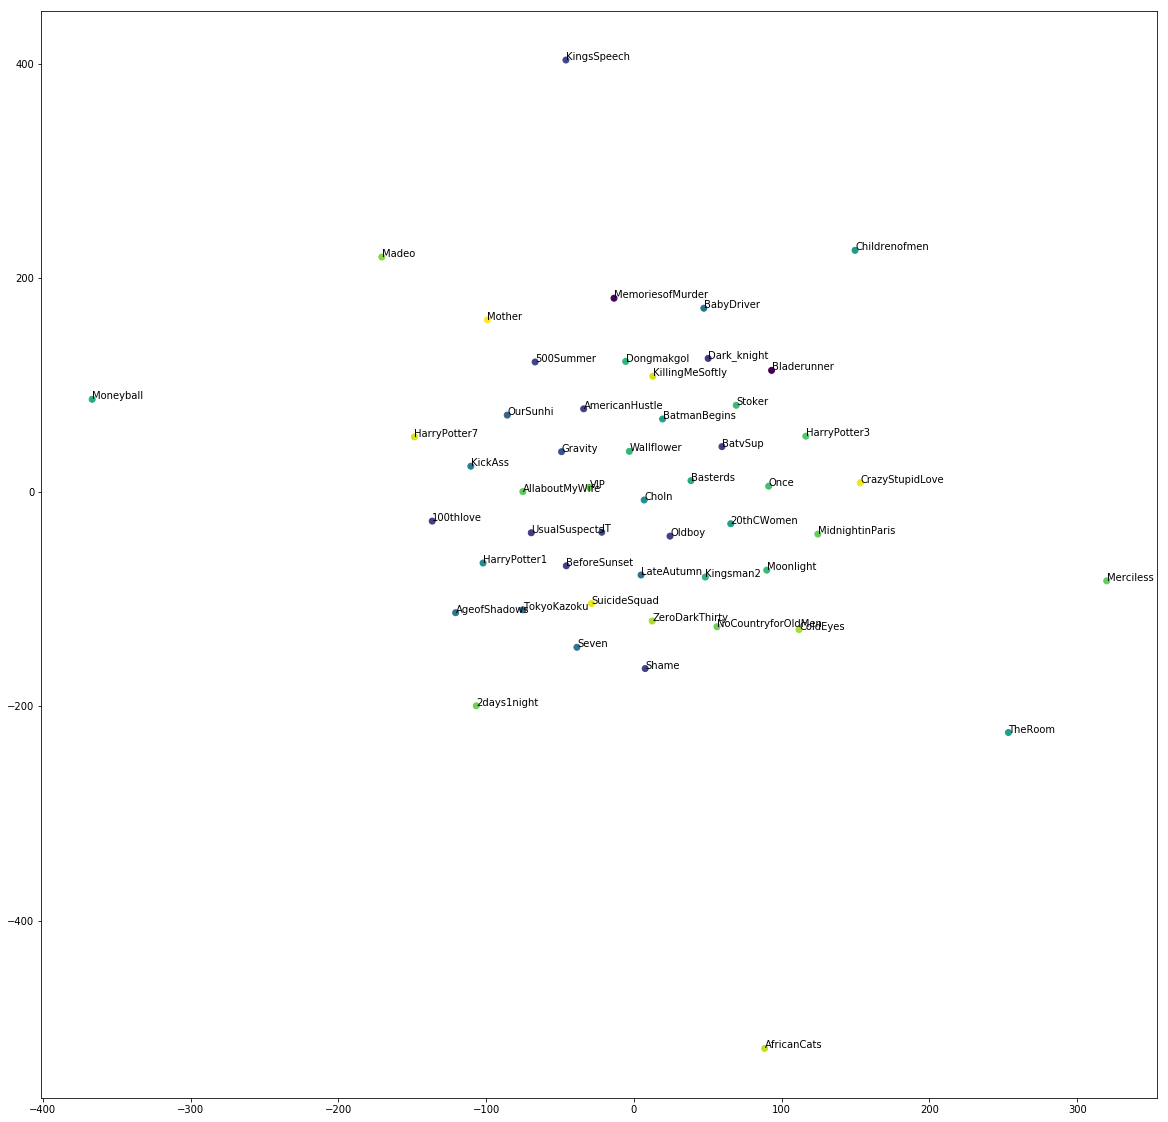

In [73]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=10000).fit_transform(np_final_features)
X_embedded.shape
# print(X_embedded)

# plt.figure(figsize=(10,10))
fig , ax = plt.subplots()
fig.set_size_inches(20,20)
ax.scatter(X_embedded[:,0],X_embedded[:,1], c=np.random.rand(51))
for i, movie in enumerate(list_of_movies):
    ax.annotate(movie, (X_embedded[i][0], X_embedded[i][1]))
    

plt.show()